1. Choose a binary classification dataset. 
2. Create a Jupyter notebook. Name it data3. It should have several sections. The first section should describe the dataset. The second section should load the dataset. The third section should binarize the categorical features, if any.
3. If the dataset already comes in train-test split, great. If not, create a train-test split, using 2/3 for train and 1/3 for test.
4. Important features

    a. Train an L2-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l2.
        Print the top 10 features and their weights (i.e., the features that have the highest absolute values).
    b. Train an L1-regularized LogisticRegression classifier on the train split; use the default parameters for all, except penalty should be set to l1.
        Print the top 10 features and their weights (i.e., the features that have the highest absolute values).
        
    c. Train a DecisionTreeClassifier  on the train split; use the default parameters for all, except max_depth=6, min_impurity_decrease=0.005.
        Visualize your tree in the notebook itself.
        
    d. Discuss your results.
    
    e. Now z-score all features using StandardScaler. z-score both train and test. use fit_transform on train, and transform on test.
    
    f. Repeat steps 1-4 (i.e., train L2-LR, print top 10 features and their weights, and so on) using the scaled version of the data and discuss your results.
5. Evidence
    For the following types of objects, create a section, and print a) the total positive evidence,  b) the total negative evidence, c) probability distribution, d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence. Print this information on the following object types
    a. The most positive object with respect to the probabilities.
    b. The most negative object with respect to the probabilities.
    c. The object that has the largest positive evidence.
    d. The object that has the largest (in magnitude) negative evidence.
    e. The most uncertain object (the probabilities are closest to 0.5)

Upload the notebook to your 595 github / bitbucket repository.
Submit the link using blackboard.

## Description of dataset:
The data is IMDB - review dataset. It's available from the website "http://ai.stanford.edu/~amaas/data/sentiment/".
The review is binary case which could be positive/negative review. It provides 25,000 reviews for training, and 25,000 reviews for testing. The distribution of class in training and testing is balanced, which means it has 12500 positive reviews and 12500 negative reviews in both training and testing.
In this assignment, we will use countvectorizer which means each token feature will be binary.

In [1]:
import glob

import numpy as np

from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import tree

import graphviz 

### Load the data 

In [2]:
def load_imdb(path):

    print("Loading the imdb reviews data")

    train_neg_files = glob.glob(path+"/train/neg/*.txt")
    train_pos_files = glob.glob(path+"/train/pos/*.txt")

    train_corpus = []
    y_train = []
    
    for tnf in train_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        line = f.read()
        train_corpus.append(line)
        y_train.append(0)
        f.close()


    for tpf in train_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        line = f.read()
        train_corpus.append(line)
        y_train.append(1)
        f.close()
    
    print("Training Data loaded.")
    print()
    
    test_neg_files = glob.glob(path+"/test/neg/*.txt")
    test_pos_files = glob.glob(path+"/test/pos/*.txt")

    test_corpus = []

    y_test = []

    for tnf in test_neg_files:
        f = open(tnf, 'r', encoding="utf8")
        test_corpus.append(f.read())
        y_test.append(0)
        f.close()

    for tpf in test_pos_files:
        f = open(tpf, 'r', encoding="utf8")
        test_corpus.append(f.read())
        y_test.append(1)
        f.close()

    print("Testing Data loaded.")
    print()
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return train_corpus, test_corpus, y_train, y_test

In [3]:
imdb_path = "../aclImdb"

In [4]:
train_corpus, test_corpus, y_train, y_test = load_imdb(imdb_path)

Loading the imdb reviews data
Training Data loaded.

Testing Data loaded.



### Non-z-score part

### Binarize and vectorize the data into matrix

In [5]:
vectorizer = CountVectorizer(min_df=5, max_df=1.0, binary=True)

X_train = vectorizer.fit_transform(train_corpus)

X_test = vectorizer.transform(test_corpus)

In [6]:
feature_name = vectorizer.get_feature_names()

In [7]:
X_train.shape

(25000, 27272)

In [8]:
# X_train = X_train.todense()
# X_train[X_train==0] = -1

# X_test = X_test.todense()
# X_test[X_test==0] = -1

### Train three different classifiers

In [9]:
# Train on L2 penalty

clf_L2 = LogisticRegression(penalty='l2')

clf_L2.fit(X_train, y_train)

coef = clf_L2.coef_[0]

coef_abs = np.abs(coef)

idx_top10 = np.argsort(coef_abs)[::-1][:10]

for idx in idx_top10:
    print("index: %d \t\t coef: %f \t\t token_name: %s" %(idx, coef[idx], feature_name[idx]))

index: 26974 		 coef: -2.336118 		 token_name: worst
index: 26430 		 coef: -2.253081 		 token_name: waste
index: 6928 		 coef: -2.052119 		 token_name: disappointment
index: 18370 		 coef: -2.041297 		 token_name: poorly
index: 1894 		 coef: -1.749109 		 token_name: awful
index: 25537 		 coef: -1.666759 		 token_name: unfunny
index: 13889 		 coef: -1.635270 		 token_name: laughable
index: 19759 		 coef: 1.600895 		 token_name: refreshing
index: 6926 		 coef: -1.595820 		 token_name: disappointing
index: 13746 		 coef: -1.591617 		 token_name: lacks


In [10]:
# Train on L1 penalty

clf_L1 = LogisticRegression(penalty='l1')

clf_L1.fit(X_train, y_train)

coef = clf_L1.coef_[0]

coef_abs = np.abs(coef)

idx_top10 = np.argsort(coef_abs)[::-1][:10]

for idx in idx_top10:
    print("index: %d \t\t coef: %f \t\t token_name: %s" %(idx, coef[idx], feature_name[idx]))

index: 26478 		 coef: -4.045770 		 token_name: wayans
index: 9178 		 coef: 3.891583 		 token_name: fez
index: 10980 		 coef: -3.622816 		 token_name: halloran
index: 18298 		 coef: 3.419895 		 token_name: poisoning
index: 24516 		 coef: -3.222484 		 token_name: thunderbirds
index: 4011 		 coef: 3.027120 		 token_name: cerebral
index: 8139 		 coef: 2.989486 		 token_name: endearingly
index: 25484 		 coef: -2.944747 		 token_name: uneducated
index: 14163 		 coef: -2.848162 		 token_name: lifeless
index: 10658 		 coef: 2.805848 		 token_name: greene


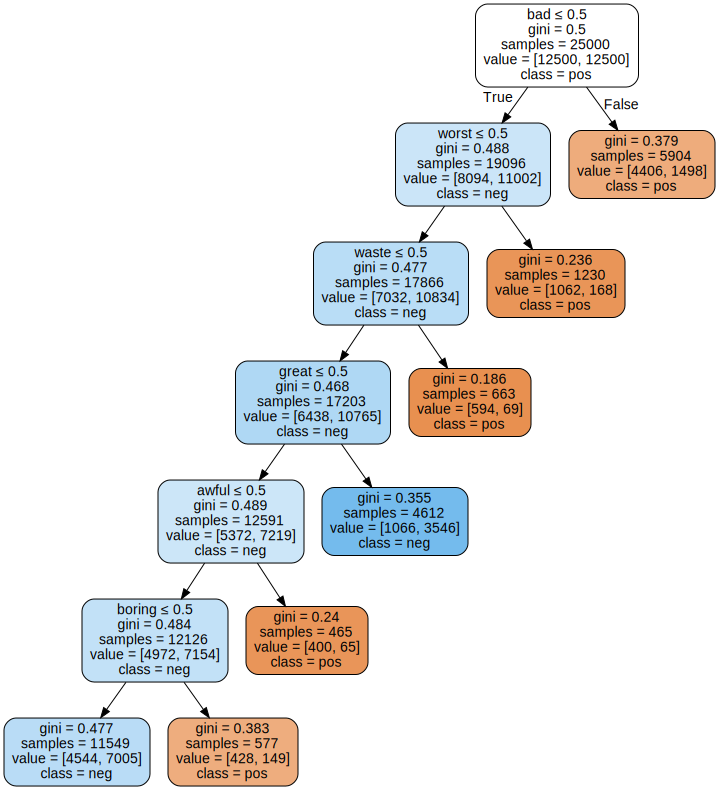

In [11]:
# Train on decision tree

def plot_DT(clf, feature_names, target_names):
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
    
    graph = graphviz.Source(dot_data) 
    
    return graph

clf_DT = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_DT.fit(X_train, y_train)

graph = plot_DT(clf_DT, feature_name, ['pos', 'neg'])

graph

### Discussion

We can see that LogisticRegression with L2 penalty is closed to decision tree when we analyze some top featuers. For example, "worst", "waste" and "awful" are apeared in both DT and L2-lr. However, L1-lr doesn't seem to provide clear transparency in this case. 

## z-score part is after evidence part. 

## This notebook has evidence analysis for both z-score and non-z-score version. 

Evidence For the following types of objects, create a section, and print a) the total positive evidence, b) the total negative evidence, c) probability distribution, d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence. Print this information on the following object types a. The most positive object with respect to the probabilities. b. The most negative object with respect to the probabilities. c. The object that has the largest positive evidence. d. The object that has the largest (in magnitude) negative evidence. e. The most uncertain object (the probabilities are closest to 0.5)

In [12]:
y_predict = clf_L2.predict(X_test)

y_proba = clf_L2.predict_proba(X_test)

In [13]:
def get_evidence(clf, x_vector):
    
    
    muliply_v = np.multiply(clf.coef_, x_vector.todense()).A1.tolist()
    
    muliply_v.append(clf.intercept_[0])
    
    neg_evi = sum(i for i in muliply_v if i < 0)
    pos_evi = sum(i for i in muliply_v if i > 0)
    
    return muliply_v, neg_evi, pos_evi

In [14]:
feature_name.append("intercept_")

In [15]:
neg_evi_list = []
pos_evi_list = []
vec_matrix = []

for v in X_test:
    muliply_v, neg_evi, pos_evi = get_evidence(clf_L2, v)
    vec_matrix.append(muliply_v)
    neg_evi_list.append(neg_evi)
    pos_evi_list.append(pos_evi)

In [16]:
def print_result(idx):
    
    feature_vector = X_test[idx].todense().A1.tolist()
        
    feature_vector.append("intercept")
    
    print("The total positive evidence: %f" %pos_evi_list[idx])
    print("The total negative evidence: %f" %neg_evi_list[idx])
    print()
    print("Probability distribution: %s" %str(y_proba[idx]))
    print()
    print("The top 3 feature values that contribute most to the positive evidence")
    
    
    vector_evi = vec_matrix[idx]
    
    top3 = np.argsort(vector_evi)[::-1][:3]
    
    for i in top3:    
        print("Feature name: %s \t\t value: %s \t\t Evidence: %s" %(feature_name[i], 
                                                                    str(feature_vector[i]), str(vector_evi[i])))
        
    print()
    print("The top 3 feature values that contribute most to the negative evidence")
    
    vector_evi = vec_matrix[idx]
    top3 = np.argsort(vector_evi)[:3]
    
    for i in top3:
        print("Feature name: %s \t\t value: %s \t\t Evidence: %s" %(feature_name[i], 
                                                                    str(feature_vector[i]), str(vector_evi[i])))

### The most positive object with respect to the probabilities

In [17]:
idx = np.argmax(y_proba[:,1])

print_result(idx)

The total positive evidence: 70.117648
The total negative evidence: -37.974892

Probability distribution: [  1.08801856e-14   1.00000000e+00]

The top 3 feature values that contribute most to the positive evidence
Feature name: excellent 		 value: 1 		 Evidence: 1.5752900428223395
Feature name: superb 		 value: 1 		 Evidence: 1.3615758997370768
Feature name: funniest 		 value: 1 		 Evidence: 1.2451367544803496

The top 3 feature values that contribute most to the negative evidence
Feature name: weak 		 value: 1 		 Evidence: -1.1496801356253439
Feature name: nothing 		 value: 1 		 Evidence: -0.8679198774645167
Feature name: oh 		 value: 1 		 Evidence: -0.8527853715017397


### The most negative object with respect to the probabilities

In [18]:
idx = np.argmax(y_proba[:,0])

print_result(idx)

The total positive evidence: 31.928737
The total negative evidence: -70.158656

Probability distribution: [  1.00000000e+00   2.49434936e-17]

The top 3 feature values that contribute most to the positive evidence
Feature name: great 		 value: 1 		 Evidence: 0.9481397426833419
Feature name: sloth 		 value: 1 		 Evidence: 0.8954054079929598
Feature name: magic 		 value: 1 		 Evidence: 0.7594234686918652

The top 3 feature values that contribute most to the negative evidence
Feature name: worst 		 value: 1 		 Evidence: -2.3361179071304656
Feature name: waste 		 value: 1 		 Evidence: -2.2530805821685647
Feature name: boring 		 value: 1 		 Evidence: -1.5567809264409675


### The object that has the largest positive evidence

In [19]:
idx = np.argmax(pos_evi_list)

print_result(idx)

The total positive evidence: 102.427957
The total negative evidence: -107.793785

Probability distribution: [ 0.99534815  0.00465185]

The top 3 feature values that contribute most to the positive evidence
Feature name: subtle 		 value: 1 		 Evidence: 1.0284732005217354
Feature name: today 		 value: 1 		 Evidence: 0.9952226466459334
Feature name: disappoint 		 value: 1 		 Evidence: 0.9795682751816203

The top 3 feature values that contribute most to the negative evidence
Feature name: worst 		 value: 1 		 Evidence: -2.3361179071304656
Feature name: poorly 		 value: 1 		 Evidence: -2.0412970501658103
Feature name: poor 		 value: 1 		 Evidence: -1.17130350484208


### The object that has the largest negative evidence

In [20]:
idx = np.argmin(neg_evi_list)

print_result(idx)

The total positive evidence: 102.427957
The total negative evidence: -107.793785

Probability distribution: [ 0.99534815  0.00465185]

The top 3 feature values that contribute most to the positive evidence
Feature name: subtle 		 value: 1 		 Evidence: 1.0284732005217354
Feature name: today 		 value: 1 		 Evidence: 0.9952226466459334
Feature name: disappoint 		 value: 1 		 Evidence: 0.9795682751816203

The top 3 feature values that contribute most to the negative evidence
Feature name: worst 		 value: 1 		 Evidence: -2.3361179071304656
Feature name: poorly 		 value: 1 		 Evidence: -2.0412970501658103
Feature name: poor 		 value: 1 		 Evidence: -1.17130350484208


### The most uncertain object (the probabilities are closest to 0.5)

In [21]:
uncerts = np.min(y_proba, axis=1)

idx = np.argmax(uncerts)

print_result(idx)

The total positive evidence: 5.424793
The total negative evidence: -5.426836

Probability distribution: [ 0.50051087  0.49948913]

The top 3 feature values that contribute most to the positive evidence
Feature name: well 		 value: 1 		 Evidence: 0.4926061919757483
Feature name: still 		 value: 1 		 Evidence: 0.43818671589876723
Feature name: guitar 		 value: 1 		 Evidence: 0.3868267360222904

The top 3 feature values that contribute most to the negative evidence
Feature name: wasting 		 value: 1 		 Evidence: -0.921351429583922
Feature name: stupid 		 value: 1 		 Evidence: -0.8932229987982756
Feature name: noise 		 value: 1 		 Evidence: -0.5418344497459429


### z-score part 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_z = scaler.fit_transform(X_train.todense())

X_test_z = scaler.transform(X_test.todense())

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
# Train on L2 penalty

clf_L2 = LogisticRegression(penalty='l2')

clf_L2.fit(X_train_z, y_train)

coef = clf_L2.coef_[0]

coef_abs = np.abs(coef)

idx_top10 = np.argsort(coef_abs)[::-1][:10]

for idx in idx_top10:
    print("index: %d \t\t coef: %f \t\t token_name: %s" %(idx, coef[idx], feature_name[idx]))

index: 26974 		 coef: -0.864907 		 token_name: worst
index: 10644 		 coef: 0.660431 		 token_name: great
index: 1968 		 coef: -0.653103 		 token_name: bad
index: 24279 		 coef: -0.612092 		 token_name: terrible
index: 2966 		 coef: -0.568938 		 token_name: boring
index: 26430 		 coef: -0.552023 		 token_name: waste
index: 8578 		 coef: 0.547515 		 token_name: excellent
index: 1894 		 coef: -0.482272 		 token_name: awful
index: 2483 		 coef: 0.453789 		 token_name: best
index: 26573 		 coef: 0.432357 		 token_name: well


In [26]:
# Train on L1 penalty

clf_L1 = LogisticRegression(penalty='l1')

clf_L1.fit(X_train_z, y_train)

coef = clf_L1.coef_[0]

coef_abs = np.abs(coef)

idx_top10 = np.argsort(coef_abs)[::-1][:10]

for idx in idx_top10:
    print("index: %d \t\t coef: %f \t\t token_name: %s" %(idx, coef[idx], feature_name[idx]))

index: 26974 		 coef: -1.242064 		 token_name: worst
index: 1968 		 coef: -0.823359 		 token_name: bad
index: 26430 		 coef: -0.823150 		 token_name: waste
index: 10644 		 coef: 0.801687 		 token_name: great
index: 1894 		 coef: -0.760321 		 token_name: awful
index: 8578 		 coef: 0.733636 		 token_name: excellent
index: 24279 		 coef: -0.682644 		 token_name: terrible
index: 2966 		 coef: -0.609449 		 token_name: boring
index: 18370 		 coef: -0.594769 		 token_name: poorly
index: 2483 		 coef: 0.591344 		 token_name: best


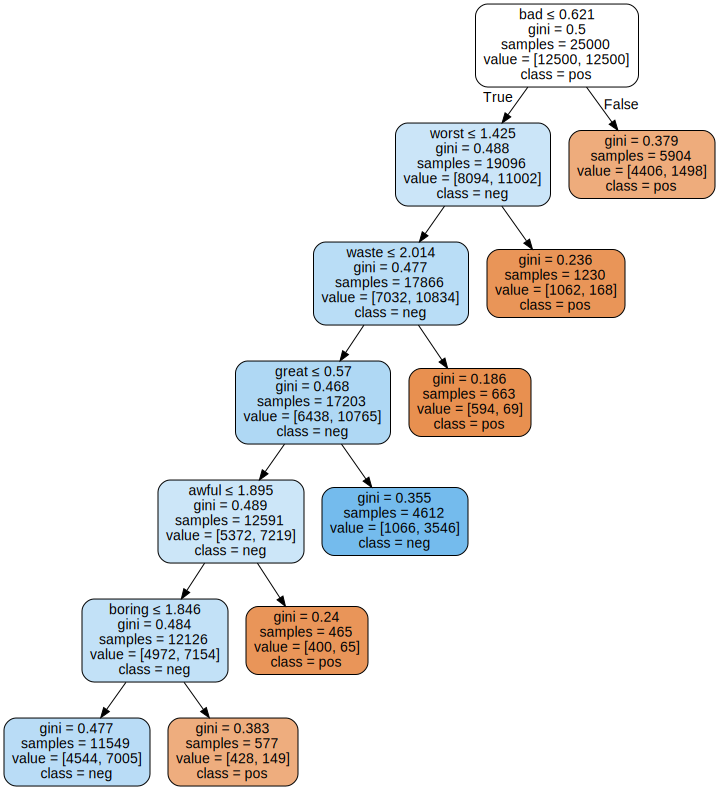

In [28]:
# Train on decision tree

clf_DT = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
clf_DT.fit(X_train_z, y_train)

graph = plot_DT(clf_DT, feature_name[:-1], ['pos', 'neg'])

graph

### Discussion

It's obvious that after z-score scaling the data, the L1-lr, L2-lr and DT are pretty similar right now. The top features are almost same in this case. Comparing with non-z-score data, the weights of logistic regression is smaller right now. 

Evidence For the following types of objects, create a section, and print a) the total positive evidence, b) the total negative evidence, c) probability distribution, d) top 3 feature values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence. Print this information on the following object types a. The most positive object with respect to the probabilities. b. The most negative object with respect to the probabilities. c. The object that has the largest positive evidence. d. The object that has the largest (in magnitude) negative evidence. e. The most uncertain object (the probabilities are closest to 0.5)

In [30]:
y_predict = clf_L2.predict(X_test_z)

y_proba = clf_L2.predict_proba(X_test_z)

In [34]:
from scipy import sparse

def get_evidence(clf, x_vector):
    
    x_vector = sparse.csr_matrix(x_vector)
    
    muliply_v = np.multiply(clf.coef_, x_vector.todense()).A1.tolist()
    
    muliply_v.append(clf.intercept_[0])
    
    neg_evi = sum(i for i in muliply_v if i < 0)
    pos_evi = sum(i for i in muliply_v if i > 0)
    
    return muliply_v, neg_evi, pos_evi

In [35]:
neg_evi_list = []
pos_evi_list = []
vec_matrix = []

for v in X_test_z:
    muliply_v, neg_evi, pos_evi = get_evidence(clf_L2, v)
    vec_matrix.append(muliply_v)
    neg_evi_list.append(neg_evi)
    pos_evi_list.append(pos_evi)

#### The most positive object with respect to the probabilities

In [36]:
idx = np.argmax(y_proba[:,1])

print_result(idx)

The total positive evidence: 122.449271
The total negative evidence: -68.251302

Probability distribution: [ 0.  1.]

The top 3 feature values that contribute most to the positive evidence
Feature name: heals 		 value: 1 		 Evidence: 4.59917265189667
Feature name: draft 		 value: 1 		 Evidence: 2.966493042912529
Feature name: turbulent 		 value: 1 		 Evidence: 2.6672211747628705

The top 3 feature values that contribute most to the negative evidence
Feature name: 1954 		 value: 1 		 Evidence: -2.3360668255869785
Feature name: substituted 		 value: 1 		 Evidence: -1.9722583935774807
Feature name: stereo 		 value: 1 		 Evidence: -1.4710823505593238


#### The most negative object with respect to the probabilities

In [37]:
idx = np.argmax(y_proba[:,0])

print_result(idx)

The total positive evidence: 77.528892
The total negative evidence: -122.411691

Probability distribution: [  1.00000000e+00   3.21846033e-20]

The top 3 feature values that contribute most to the positive evidence
Feature name: rehashes 		 value: 1 		 Evidence: 2.4267915164429565
Feature name: substantive 		 value: 1 		 Evidence: 2.238729770841941
Feature name: spared 		 value: 1 		 Evidence: 1.7430331887136576

The top 3 feature values that contribute most to the negative evidence
Feature name: plagiarized 		 value: 1 		 Evidence: -5.56237557750728
Feature name: critters 		 value: 1 		 Evidence: -3.915359674107001
Feature name: sliver 		 value: 1 		 Evidence: -3.750672698046096


#### The object that has the largest positive evidence

In [38]:
idx = np.argmax(pos_evi_list)

print_result(idx)

The total positive evidence: 282.088605
The total negative evidence: -253.331882

Probability distribution: [  3.24407168e-13   1.00000000e+00]

The top 3 feature values that contribute most to the positive evidence
Feature name: beckett 		 value: 1 		 Evidence: 8.608982577569904
Feature name: ailing 		 value: 1 		 Evidence: 4.717527146269021
Feature name: expires 		 value: 1 		 Evidence: 4.051625968245307

The top 3 feature values that contribute most to the negative evidence
Feature name: innocently 		 value: 1 		 Evidence: -3.100010643882983
Feature name: encyclopedia 		 value: 1 		 Evidence: -3.00048900632593
Feature name: mirrored 		 value: 1 		 Evidence: -2.8160861867355584


#### The object that has the largest negative evidence

In [40]:
idx = np.argmin(neg_evi_list)

print_result(idx)

The total positive evidence: 282.088605
The total negative evidence: -253.331882

Probability distribution: [  3.24407168e-13   1.00000000e+00]

The top 3 feature values that contribute most to the positive evidence
Feature name: beckett 		 value: 1 		 Evidence: 8.608982577569904
Feature name: ailing 		 value: 1 		 Evidence: 4.717527146269021
Feature name: expires 		 value: 1 		 Evidence: 4.051625968245307

The top 3 feature values that contribute most to the negative evidence
Feature name: innocently 		 value: 1 		 Evidence: -3.100010643882983
Feature name: encyclopedia 		 value: 1 		 Evidence: -3.00048900632593
Feature name: mirrored 		 value: 1 		 Evidence: -2.8160861867355584


#### The most uncertain object (the probabilities are closest to 0.5)

In [41]:
uncerts = np.min(y_proba, axis=1)

idx = np.argmax(uncerts)

print_result(idx)

The total positive evidence: 43.817535
The total negative evidence: -43.816036

Probability distribution: [ 0.49962509  0.50037491]

The top 3 feature values that contribute most to the positive evidence
Feature name: taps 		 value: 1 		 Evidence: 2.932029804137935
Feature name: excellent 		 value: 1 		 Evidence: 1.9775026292239941
Feature name: gratifying 		 value: 1 		 Evidence: 1.3957867777193886

The top 3 feature values that contribute most to the negative evidence
Feature name: winston 		 value: 1 		 Evidence: -2.79535624784082
Feature name: dolby 		 value: 1 		 Evidence: -1.8755984718459628
Feature name: unfortunately 		 value: 1 		 Evidence: -1.1287784936516574
